In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
covid_df.nunique()

date       146
county    1784
state       55
fips      3002
cases     7068
deaths    1526
dtype: int64

In [5]:
subset_df = covid_df.loc[:, ['date', 'state']]
first_50_df = covid_df.loc[range(50), : ]
california_df = covid_df.loc[covid_df.state == "California", :]

In [6]:
california_df.head()

,date,county,state,fips,cases,deaths
5,2020-01-25,Orange,California,6059.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0
10,2020-01-26,Orange,California,6059.0,1,0
14,2020-01-27,Los Angeles,California,6037.0,1,0
15,2020-01-27,Orange,California,6059.0,1,0


In [7]:
covid_df.loc[:, "cases"] / (covid_df.loc[:, "deaths"] + 1)

0          1.000000
1          1.000000
2          1.000000
3          1.000000
4          1.000000
5          1.000000
6          1.000000
7          1.000000
8          1.000000
9          1.000000
10         1.000000
11         1.000000
12         1.000000
13         1.000000
14         1.000000
15         1.000000
16         1.000000
17         1.000000
18         1.000000
19         1.000000
20         1.000000
21         1.000000
22         1.000000
23         1.000000
24         1.000000
25         1.000000
26         1.000000
27         1.000000
28         1.000000
29         1.000000
            ...    
236737     3.000000
236738    22.461538
236739    25.111111
236740    19.500000
236741    16.000000
236742    51.800000
236743    10.500000
236744    26.000000
236745    11.000000
236746    44.000000
236747    12.000000
236748    24.000000
236749     6.000000
236750    30.500000
236751     5.000000
236752    13.000000
236753     9.000000
236754    65.000000
236755    15.000000


In [8]:
state_df = covid_df.groupby(["state"]).sum().reset_index()

In [9]:
date_df = covid_df.groupby(['date']).sum().reset_index()

In [10]:
date_df.loc[:, "deaths"].diff() #diff subtracts each row from the row above


0         NaN
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
        ...  
116    1226.0
117     844.0
118     789.0
119    1643.0
120    1477.0
121    1307.0
122    1169.0
123    1173.0
124     613.0
125     492.0
126     772.0
127    1460.0
128    1224.0
129    1191.0
130     963.0
131     604.0
132     735.0
133    1080.0
134     989.0
135    1006.0
136    1115.0
137     728.0
138     390.0
139     722.0
140    1030.0
141     921.0
142     878.0
143     780.0
144     692.0
145     318.0
Name: deaths, Length: 146, dtype: float64

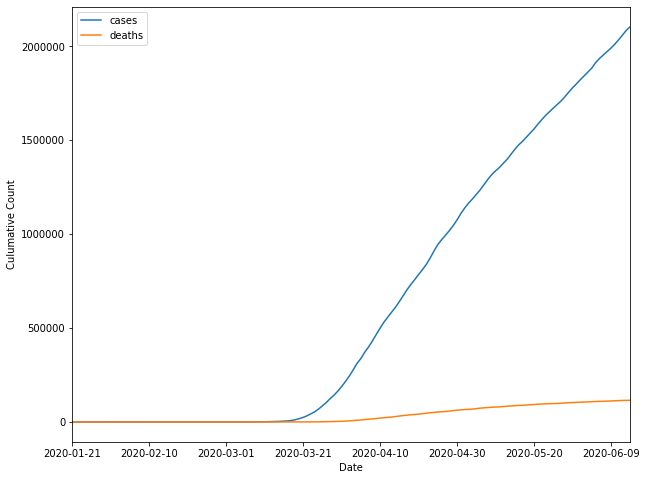

In [11]:
date_df.set_index("date").loc[:, ["cases", "deaths"]].plot(figsize=(10,8))
plt.xlabel("Date")
plt.ylabel("Culumative Count")
plt.show()

In [12]:
ny_df = covid_df.loc[(covid_df.state == "New York"), :]

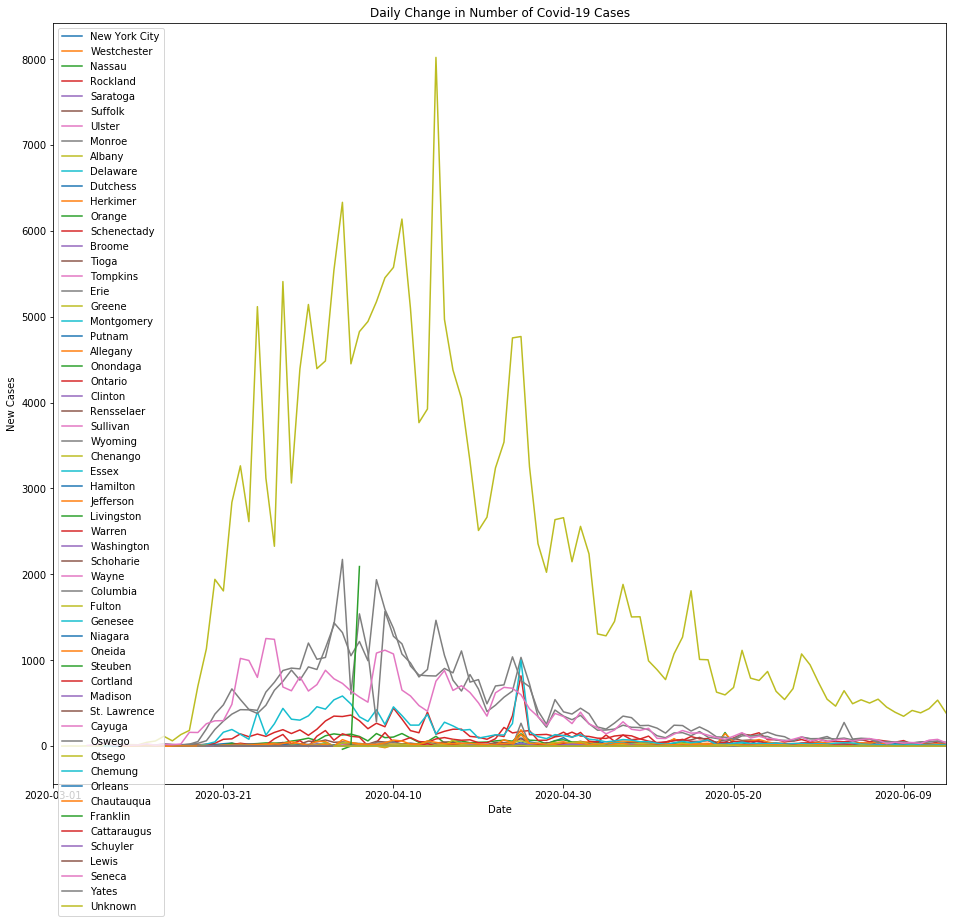

In [14]:
plotting_df = ny_df.loc[:, ["date","county", 'cases']].groupby(["date", 'county']).sum().unstack()
plotting_df = plotting_df.diff()

# This line renames the columns to be each of the states names
plotting_df = plotting_df.set_axis(ny_df.county.unique(), axis=1, inplace=False)

# These lines actually plot the data by state
plotting_df.plot(figsize=(16, 14));
plt.title("Daily Change in Number of Covid-19 Cases in New York")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

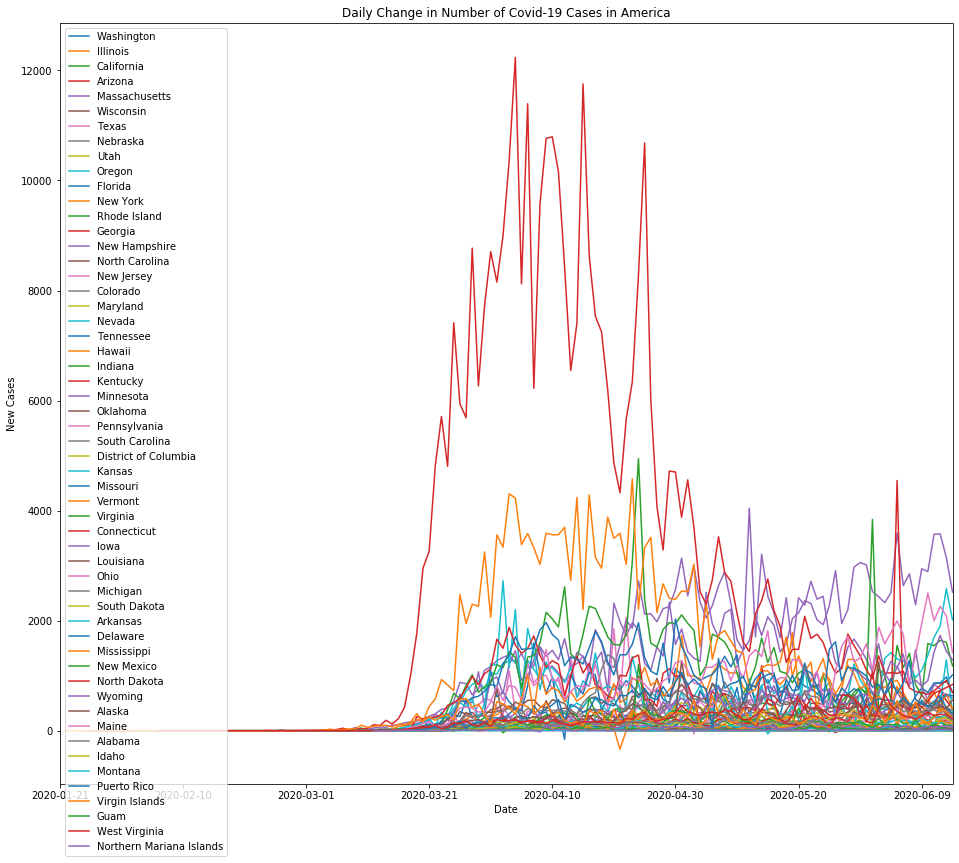

In [18]:
plotting_df = covid_df.loc[:, ["date","state", 'cases']].groupby(["date", 'state']).sum().unstack()
plotting_df = plotting_df.diff()

# This line renames the columns to be each of the states names
plotting_df = plotting_df.set_axis(covid_df.state.unique(), axis=1, inplace=False)

# These lines actually plot the data by state
plotting_df.plot(figsize=(16, 14));
plt.title("Daily Change in Number of Covid-19 Cases in America")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()